In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
data = pd.read_excel('../datasource/avg_fuel_price_24.xlsx', sheet_name='2026')
data

,седмица,бензин,дизел,пб
0,05.01 - 11.01.26,"1,24","1,25","0,58"
1,12.01 - 18.01.26,"1,24","1,26","0,59"
2,19.01 - 25.01.26,"1,24","1,26","0,59"
3,26.01 - 01.02.26,"1,24","1,26","0,57"
4,02.02 - 08.02.26,"1,24","1,26","0,58"
5,09.02 - 15.02.26,"1,24","1,26","0,58"
6,16.02 - 22.02.26,"1,24","1,26","0,58"


In [88]:
data['бензин'] = data['бензин'].map(lambda x: float(str(x).replace(',', '.')) / 1.95583)
data['дизел'] = data['дизел'].map(lambda x: float(str(x).replace(',', '.')) / 1.95583)
data['пб'] = data['пб'].map(lambda x: float(str(x).replace(',', '.')) / 1.95583)

In [89]:
data

,седмица,бензин,дизел,пб
0,05.01 - 11.01.26,0.634002,0.639115,0.296549
1,12.01 - 18.01.26,0.634002,0.644228,0.301662
2,19.01 - 25.01.26,0.634002,0.644228,0.301662
3,26.01 - 01.02.26,0.634002,0.644228,0.291436
4,02.02 - 08.02.26,0.634002,0.644228,0.296549
5,09.02 - 15.02.26,0.634002,0.644228,0.296549
6,16.02 - 22.02.26,0.634002,0.644228,0.296549


In [90]:
data.describe()

,бензин,дизел,пб
count,7.000000,7.000000,7.000000
mean,0.634002,0.643497,0.297280
std,0.000000,0.001933,0.003528
min,0.634002,0.639115,0.291436
25%,0.634002,0.644228,0.296549
50%,0.634002,0.644228,0.296549
75%,0.634002,0.644228,0.299106
max,0.634002,0.644228,0.301662


In [91]:
def show_trend(fuel):
    x = np.arange(len(data))
    y = data[fuel]


    trend = y.rolling(4).mean()

    plt.figure(figsize=(10,6))

    plt.plot(x, y, linewidth=2, alpha=0.6, label='Реална цена')
    plt.plot(x, trend, linewidth=3, label='Тренд (4 седм. MA)')

    plt.title(f"Средна седмична цена на {fuel} за 2024")
    plt.xlabel('Седмица')
    plt.ylabel('Цена (€)')

    plt.xticks(x[::5])
    plt.grid(alpha=0.3)
    plt.legend()

    plt.tight_layout()
    plt.show()

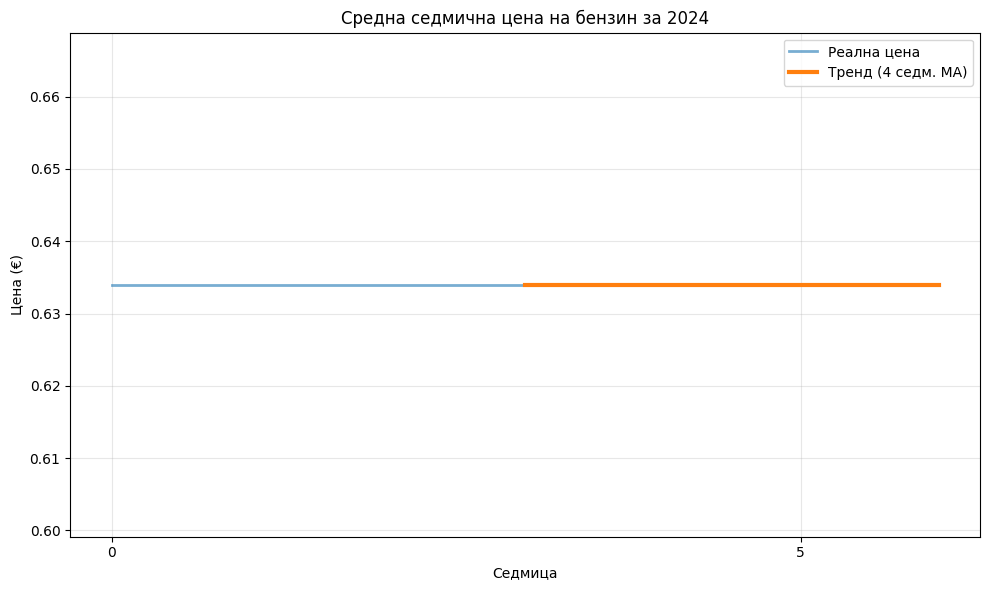

In [92]:
show_trend('бензин')

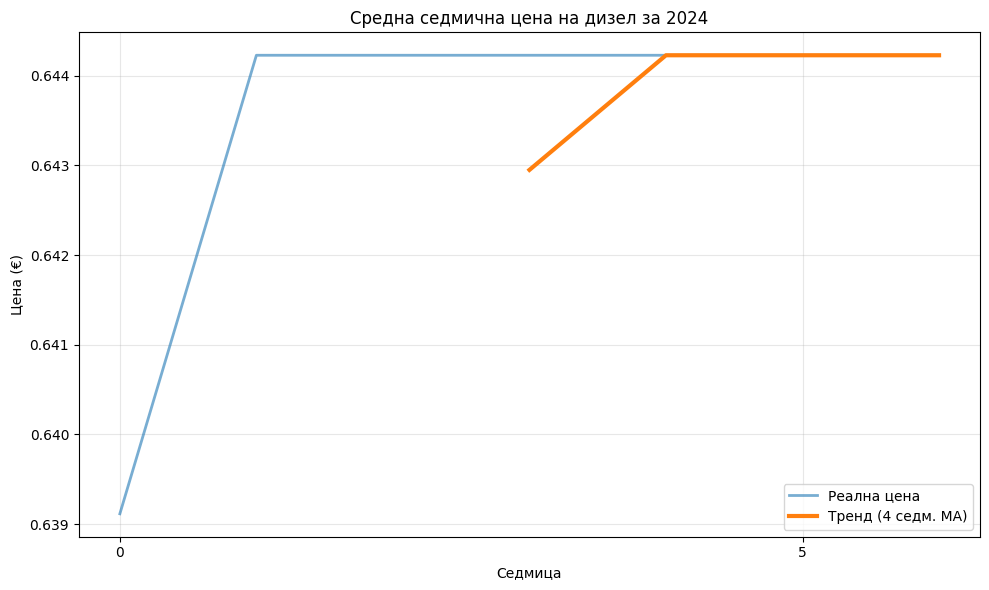

In [93]:
show_trend('дизел')

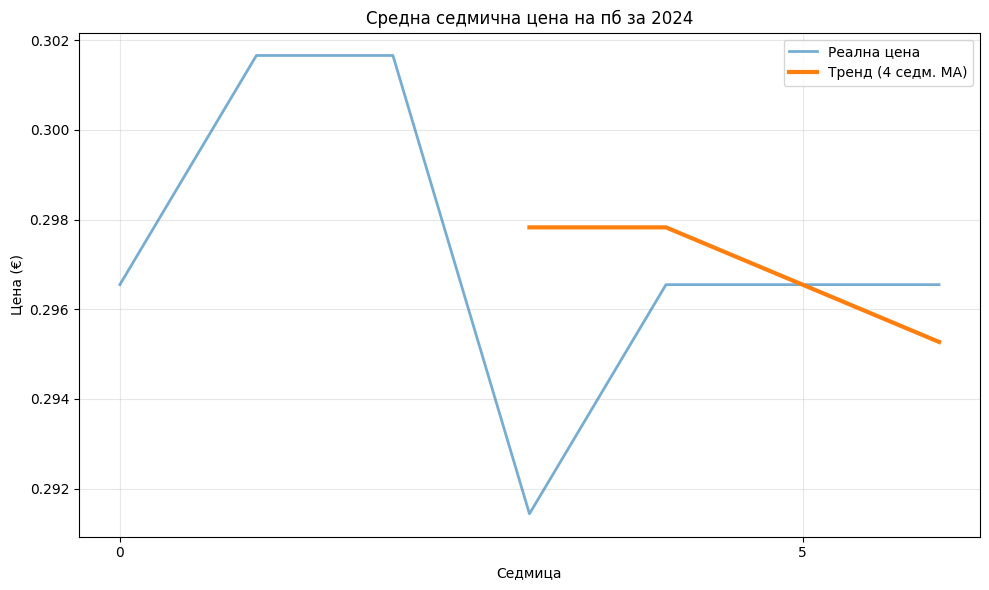

In [94]:
show_trend('пб')

Когато реалната цена е под оранжевата тренд линия, това означава, че цената се движи под средната цена за последните три седмици